In [22]:
english_lst=['pudding/custard','smashed potatoes','carrots','spanich','veal breaded cutlet','oranges','scallops','beans','bread','yogurt','pizza','pasta']
foods_list=['budino', 'patate/pure', 'carote', 'spinaci', 'cotoletta', 'mandarini', 'scaloppine', 'fagiolini', 'pane', 'yogurt', 'pizza','pasta']
food_diction={'patate/pure': 2, 'BG': 0, 'pane': 9, 'spinaci': 4, 'cotoletta': 5, 'mandarini': 6, 'scaloppine': 7, 'budino': 1, 'carote': 3, 'yogurt': 10, 'pizza': 11, 'fagiolini': 8,'pasta':12}

In [6]:
import os
import sys
import random
import math
import time
import numpy as np
import skimage.io
import matplotlib
import json
import matplotlib.pyplot as plt

In [7]:
MAIN_DIRECTORY = os.path.abspath("../")
sys.path.append(MAIN_DIRECTORY)  

In [11]:
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.config import Config

In [9]:
MODEL_DIRECTORY = os.path.join(MAIN_DIRECTORY, "logs")

In [10]:
class FoodConfig(Config):
    NAME='food'
    GPU_COUNT=1
    IMAGES_PER_GPU=1
    NUM_CLASSES = 1 + 12 
    RPN_ANCHOR_SCALES = (4,8,16, 32,64)
    TRAIN_ROIS_PER_IMAGE = 32
    STEPS_PER_EPOCH = 100
    VALIDATION_STEPS = 10
    LEARNING_RATE=0.02

In [12]:
TRAINING_DATA=os.path.join(MAIN_DIRECTORY,"datasets/food/train")

In [13]:
annotations = json.load(open(os.path.join(TRAINING_DATA, "annotation.json")))

In [14]:
 class LoadFood(utils.Dataset):
    def load_food(self):
        for n,i in enumerate(english_lst):
                 self.add_class("food", n+1,i )

        for a in annotations:
            polygons=annotations[a];
            image_path = os.path.join(TRAINING_DATA,a+".jpg")
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]
            self.add_image(
                        "food",
                        image_id=a+".jpg", 
                        path=image_path,
                        width=width, height=height,
                        polygons=polygons)
            
    def load_mask(self, image_id):
        """
               Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        image_info = self.image_info[image_id]
        if image_info["source"] != "food":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            p=list(p.values())
            rr, cc = skimage.draw.polygon(p[0]['BR'][1::2], p[0]['BR'][::2])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        items_names=[''.join(key.keys()) for key in info['polygons']]
        item_ids=list(map(lambda x:food_diction[x],items_names))
        return mask.astype(np.bool), np.array(item_ids, dtype=np.int32)
    

    
    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "food":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)
            
    

In [15]:
VALIDATION_DATA=os.path.join(MAIN_DIRECTORY,"datasets/food/val")

In [16]:
annotations = json.load(open(os.path.join(VALIDATION_DATA, "annotation.json")))

In [17]:
 class LoadValFood(utils.Dataset):
    def load_food(self):
        for n,i in enumerate(english_lst):
                 self.add_class("food", n+1,i )

        for a in annotations:
            polygons=annotations[a];
            image_path = os.path.join(VALIDATION_DATA,a+".jpg")
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]
            self.add_image(
                        "food",
                        image_id=a+".jpg", 
                        path=image_path,
                        width=width, height=height,
                        polygons=polygons)
            
    def load_mask(self, image_id):
        """
               Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        image_info = self.image_info[image_id]
        if image_info["source"] != "food":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            p=list(p.values())
            rr, cc = skimage.draw.polygon(p[0]['BR'][1::2], p[0]['BR'][::2])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        items_names=[''.join(key.keys()) for key in info['polygons']]
        item_ids=list(map(lambda x:food_diction[x],items_names))
        return mask.astype(np.bool), np.array(item_ids, dtype=np.int32)
    
    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "food":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)
    

In [23]:
valfood=LoadValFood()
valfood.load_food();
valfood.prepare()

In [19]:
loadfood=LoadFood()
loadfood.load_food();
loadfood.prepare()

FileNotFoundError: No such file: 'E:\College Project\Mask_RCNN\datasets\food\train\20151211_120606.jpg'

In [ ]:
print("Image Count: {}".format(len(valfood.image_ids)))

In [ ]:
for i, info in enumerate(loadfood.class_info):
    print("{:3}. {:50}".format(i, info['name']))

In [39]:
config=FoodConfig()
# model = modellib.MaskRCNN(mode="training", config=config,
#                           model_dir=MODEL_DIRECTORY)

In [ ]:
COCO_DIRECTORY = os.path.join(MAIN_DIRECTORY, "logs\mask_rcnn_coco.h5'")

In [ ]:
init_with = "coco" 
if init_with == "coco":
    model.load_weights("mask_rcnn_coco.h5", by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    model.load_weights("/Mask_RCNN/logs/food20190224T0936/mask_rcnn_food_0003.h5", by_name=True)

In [ ]:
model.train(loadfood, valfood, 
            learning_rate=config.LEARNING_RATE, 
            epochs=200, 
            layers='all')

In [24]:
from mrcnn.model import log

In [25]:
class InferenceConfig(FoodConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

#create the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIRECTORY)

model_path='model_044.h5'
print(model_path)
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

model_044.h5
Loading weights from  model_044.h5


Processing 1 images
image                    shape: (2448, 3264, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 25)               min:    0.00000  max: 3264.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.04424  max:    0.99885  float32


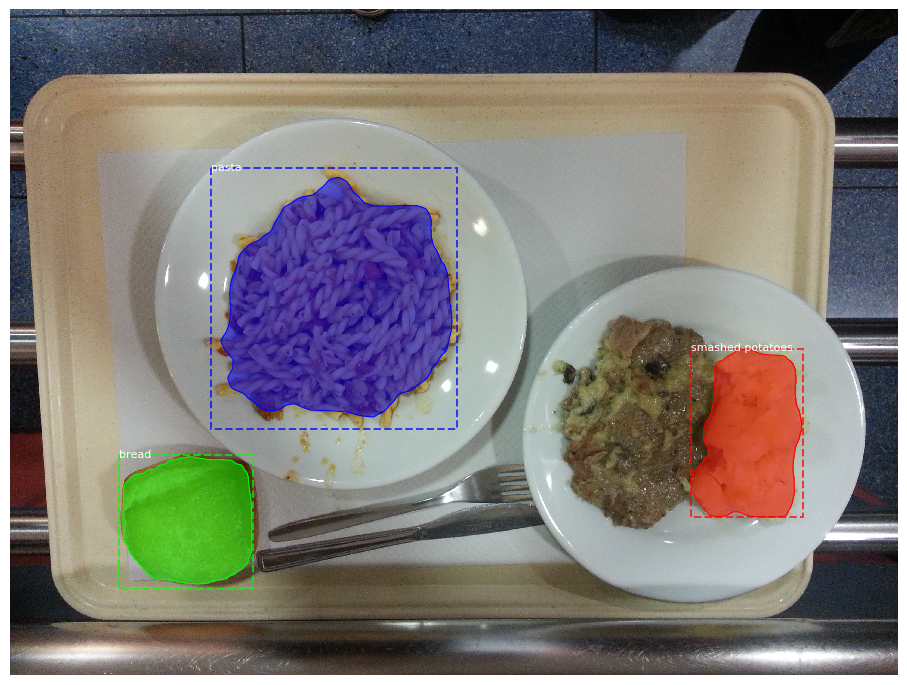

In [26]:
image = skimage.io.imread("valimage.jpg.")
results = model.detect([image], verbose=1)
r = results[0]
class_names=['BG','pudding/custard','smashed potatoes','carrots','spanich','veal breaded cutlet','oranges','scallops','beans','bread','yogurt','pizza','pasta'];
valfood.class_names
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],class_names)


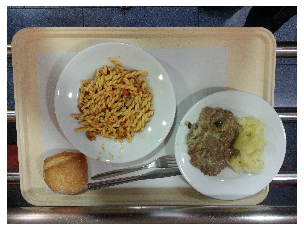

In [27]:
plt.axis("off")
plt.imshow(image)

In [25]:
results = model.detect([image], verbose=0)
r = results[0]

In [26]:
calorie_per_sq_inch={'smashed potatoes':1.4778,'carrots':0.7256,'spanich':0.4102,'veal breaded cutlet':4.4247,'scallops':0.9823,'beans':0.5486,'pizza':6.2477,'pasta':3.5398}
calorie_per_unit={'pudding/custard':130,'oranges':45,'bread':130,'yogurt':102}
def get_calorie(class_name,real_food_area):
        if class_name in calorie_per_unit:
            return calorie_per_unit[class_name]
        else:
            return calorie_per_sq_inch[class_name]*real_food_area


In [27]:
masked_plate_pixels=1130972
real_plate_size=12
real_plate_area=113.04
pixels_per_inch_sq=masked_plate_pixels/real_plate_area
calories=[]
items=[]
for i in range(r['masks'].shape[-1]):
#   print(i)
  masked_food_pixels=r['masks'][:,:,i].sum()
  class_name=valfood.class_names[r['class_ids'][i]]
  real_food_area=masked_food_pixels/pixels_per_inch_sq
  calorie=get_calorie(class_name,real_food_area)
  calories.append(calorie)
  items.append(class_name)
  print("{1} with {0} calories".format(int(calorie),class_name))

bread with 130 calories
pasta with 196 calories
smashed potatoes with 28 calories


In [28]:
import cv2
cap = cv2.VideoCapture(0)#Check whether user selected camera is opened successfully.
if not (cap.isOpened()):
    print("Could not open video device")


*** No instances to display *** 



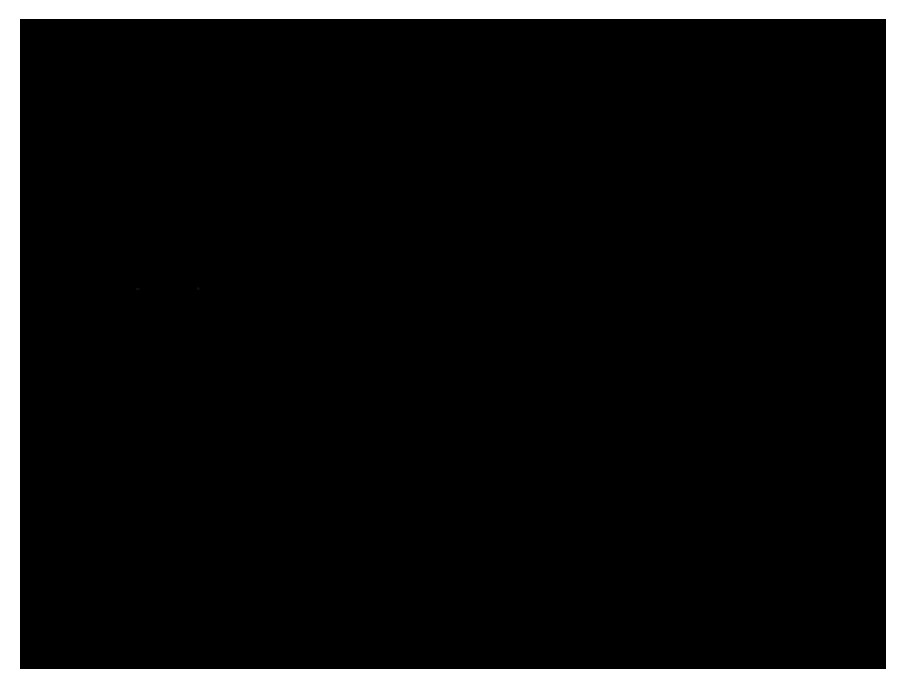


*** No instances to display *** 



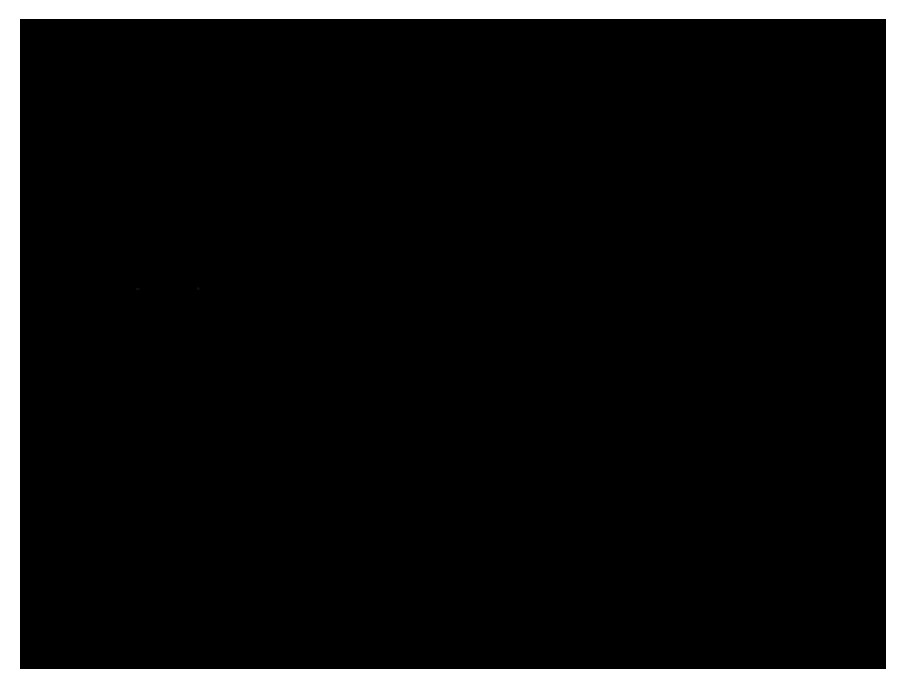

In [34]:
colors = visualize.random_colors(len(class_names))
gentle_grey = (45, 65, 79)
white = (255, 255, 255)
OPTIMIZE_CAM = False
SHOW_FPS = False
SHOW_FPS_WO_COUNTER = True # faster
PROCESS_IMG = True
if OPTIMIZE_CAM:
     vs = WebcamVideoStream(src=0).start()
else:
     vs = cv2.VideoCapture(0)
if SHOW_FPS:
     fps_caption = "FPS: 0"
     fps_counter = 0
     start_time = time.time()
SCREEN_NAME = "Real-Time Webcam"
cv2.namedWindow(SCREEN_NAME, cv2.WINDOW_NORMAL)
cv2.setWindowProperty(SCREEN_NAME, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
while True:
     if OPTIMIZE_CAM:
            frame=vs.read()
     else:
            grabbed,frame=vs.read()
     if not grabbed:
            break
     if SHOW_FPS_WO_COUNTER:
            start_time = time.time()
     if PROCESS_IMG: 
             results = model.detect([frame])
             r = results[0]
             visualize.display_instances(frame, r["rois"], r["masks"], r["class_ids"], class_names, r["scores"], colors=colors)
             masked_image = visualize.display_instances(frame, r["rois"], r["masks"], r["class_ids"], class_names, r["scores"], colors=colors)
     if PROCESS_IMG:
             s = masked_image
     else:
             s = frame
             width = s.shape[1]
             height = s.shape[0]
             top_left_corner = (width-120, height-20)
             bott_right_corner = (width, height)
             top_left_corner_cvtext = (width-80, height-5)
             s = cv2.resize(s,(1920,1080))
             cv2.imshow(SCREEN_NAME, s)
             cv2.waitKey(1)
     if OPTIMIZE_CAM:
             vs.stop()
     else:
             vs.release()
             cv2.destroyAllWindows()